In [1]:
import torch

In [2]:
A = torch.tensor([
    [1.0, 4.0, 7.0],
    [2.0, 3.0, 6.0]
])

In [3]:
A

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [4]:
X = torch.tensor([
    [1.0, 4.0, 7.0],
     [2.0, 3.0, 6.0]
], dtype=torch.bfloat16)

In [5]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [6]:
X.shape

torch.Size([2, 3])

In [7]:
X.dtype

torch.bfloat16

In [8]:
X[0, 1]

tensor(4., dtype=torch.bfloat16)

In [9]:
X[:, 1]

tensor([4., 3.], dtype=torch.bfloat16)

In [10]:
X.abs()

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [11]:
torch.abs(X)

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [12]:
# torch.cos(), torch.exp(), torch.max(), torch.mean(), torch.sqrt()

In [13]:
X.sqrt()

tensor([[1.0000, 2.0000, 2.6406],
        [1.4141, 1.7344, 2.4531]], dtype=torch.bfloat16)

In [14]:
10 * (X + 1.0)

tensor([[20., 50., 80.],
        [30., 40., 70.]], dtype=torch.bfloat16)

In [15]:
X.exp()

tensor([[   2.7188,   54.5000, 1096.0000],
        [   7.3750,   20.1250,  404.0000]], dtype=torch.bfloat16)

In [16]:
X.mean()

tensor(3.8281, dtype=torch.bfloat16)

In [17]:
X.max(dim=0) #, keepdim=True

torch.return_types.max(
values=tensor([2., 4., 7.], dtype=torch.bfloat16),
indices=tensor([1, 0, 0]))

In [18]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [19]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]], dtype=torch.bfloat16)

In [20]:
import numpy as np

In [21]:
A.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [22]:
torch.tensor(np.array([[1., 4., 7.],
                      [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [23]:
# It’s generally better to use 32 bits in deep learning because this takes half the RAM and speeds up computations,
# and neural nets do not actually need the extra precision offered by 64-bit floats.

In [24]:
N = torch.FloatTensor(np.array([            # automatically converts the array to 32 bits
                            [1., 4., 7.],
                            [2., 3., 6 ]
                              ]))
N

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [25]:
N.dtype

torch.float32

In [26]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]], dtype=torch.bfloat16)

In [27]:
X.relu()

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [28]:
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]], dtype=torch.bfloat16)

In [29]:
X.relu_()

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [30]:
X    # _ changed in place

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [31]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [32]:
device

'cuda'

In [33]:
!nvidia-smi   # watch -n 1 nvidia-smi

Tue Feb 10 14:01:56 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [34]:
M = torch.tensor([
    [1., 2., 3.],
    [4., 5., 6.]
])
M = M.to(device)

In [35]:
M

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')

In [36]:
M.device

device(type='cuda', index=0)

In [37]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [38]:
R = M @ M.T

In [39]:
R

tensor([[14., 32.],
        [32., 77.]], device='cuda:0')

In [40]:
M = torch.rand((1000, 1000))  # on the CPU
%timeit M @ M.T


M = torch.rand((1000, 1000), device="cuda")  # on the GPU
%timeit M @ M.T

# now try 100 by 100 :D

21 ms ± 3.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
576 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [42]:
f.backward()
x.grad

tensor(10.)

In [43]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step

In [44]:
x

tensor(4., requires_grad=True)

In [45]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad   # detach yaddashda eyni yerdedi

In [46]:
x_detached

tensor(3.)

In [47]:
x.grad.zero_()

tensor(0.)

In [48]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    print(x)
    # print(x.grad)
    x.grad.zero_()  # reset the gradients

tensor(4., requires_grad=True)
tensor(3.2000, requires_grad=True)
tensor(2.5600, requires_grad=True)
tensor(2.0480, requires_grad=True)
tensor(1.6384, requires_grad=True)
tensor(1.3107, requires_grad=True)
tensor(1.0486, requires_grad=True)
tensor(0.8389, requires_grad=True)
tensor(0.6711, requires_grad=True)
tensor(0.5369, requires_grad=True)
tensor(0.4295, requires_grad=True)
tensor(0.3436, requires_grad=True)
tensor(0.2749, requires_grad=True)
tensor(0.2199, requires_grad=True)
tensor(0.1759, requires_grad=True)
tensor(0.1407, requires_grad=True)
tensor(0.1126, requires_grad=True)
tensor(0.0901, requires_grad=True)
tensor(0.0721, requires_grad=True)
tensor(0.0576, requires_grad=True)
tensor(0.0461, requires_grad=True)
tensor(0.0369, requires_grad=True)
tensor(0.0295, requires_grad=True)
tensor(0.0236, requires_grad=True)
tensor(0.0189, requires_grad=True)
tensor(0.0151, requires_grad=True)
tensor(0.0121, requires_grad=True)
tensor(0.0097, requires_grad=True)
tensor(0.0077, requires_

In [49]:
# t = torch.tensor(2.0, requires_grad=True)
# z = t.exp()  # this is an intermediate result
# z += 1  # this is an in-place operation
# z.backward()  #  RuntimeError!

In [50]:
# but

t = torch.tensor(2.0, requires_grad=True)
z = t.exp()  # this is an intermediate result
z = z + 1  # new tensor created, and previous saved for computation graph
z.backward()

# make sure you don’t modify in place a tensor needed for backprop

In [51]:
import sklearn

In [52]:
X, y = sklearn.datasets.fetch_california_housing(return_X_y=True)

In [53]:
X_train_full, X_test, y_train_full, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [54]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_train_full, y_train_full, test_size=0.2)

In [55]:
X_train.shape, X_valid.shape, X_test.shape

((13209, 8), (3303, 8), (4128, 8))

In [56]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

In [57]:
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
y_valid = torch.FloatTensor(y_valid).reshape(-1, 1)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)


In [58]:
torch.manual_seed(42)
n_features = X_train.shape[1]
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

In [59]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
  y_pred = X_train @ w + b
  loss = ((y_pred - y_train) ** 2).mean()
  loss.backward()
  with torch.no_grad():
    b -= learning_rate * b.grad
    w -= learning_rate * w.grad
    b.grad.zero_()
    w.grad.zero_()
  print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')



Epoch 1/20, Loss: 16.114837646484375
Epoch 2/20, Loss: 4.919301986694336
Epoch 3/20, Loss: 2.2728583812713623
Epoch 4/20, Loss: 1.3320074081420898
Epoch 5/20, Loss: 0.9612836241722107
Epoch 6/20, Loss: 0.8040913343429565
Epoch 7/20, Loss: 0.7302672863006592
Epoch 8/20, Loss: 0.6902678608894348
Epoch 9/20, Loss: 0.6647786498069763
Epoch 10/20, Loss: 0.6461021304130554
Epoch 11/20, Loss: 0.6310787796974182
Epoch 12/20, Loss: 0.6183480620384216
Epoch 13/20, Loss: 0.6072724461555481
Epoch 14/20, Loss: 0.5975131988525391
Epoch 15/20, Loss: 0.5888603925704956
Epoch 16/20, Loss: 0.5811642408370972
Epoch 17/20, Loss: 0.5743065476417542
Epoch 18/20, Loss: 0.5681886672973633
Epoch 19/20, Loss: 0.5627256631851196
Epoch 20/20, Loss: 0.5578435063362122


In [60]:
X_new = X_test[:3]
with torch.no_grad():
  y_pred = X_new @ w + b

y_pred

tensor([[1.9263],
        [1.6814],
        [1.3013]])

In [61]:
y_test[:3]

tensor([[2.0000],
        [1.1180],
        [0.6460]])

In [62]:
import torch.nn as nn

In [63]:
torch.manual_seed(42)
model = nn.Linear(in_features = n_features, out_features=1)

In [64]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [65]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [66]:
model.parameters()

<generator object Module.parameters at 0x79e8886fb5a0>

In [67]:
next(model.parameters())

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [68]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [69]:
for name, param in model.named_parameters():
  print(f'{name} | {param}')

weight | Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
bias | Parameter containing:
tensor([0.3117], requires_grad=True)


In [70]:
model(X_train[:2])

tensor([[ 0.1241],
        [-0.4579]], grad_fn=<AddmmBackward0>)

In [71]:
y_train[:2]

tensor([[1.1880],
        [0.7390]])

In [72]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()

In [73]:
model(X_train[:2])

tensor([[ 0.1241],
        [-0.4579]], grad_fn=<AddmmBackward0>)

In [74]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
  for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

In [75]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.240505218505859
Epoch 2/20, Loss: 0.7626982927322388
Epoch 3/20, Loss: 0.612217903137207
Epoch 4/20, Loss: 0.5935878753662109
Epoch 5/20, Loss: 0.5834546685218811
Epoch 6/20, Loss: 0.5753665566444397
Epoch 7/20, Loss: 0.5684622526168823
Epoch 8/20, Loss: 0.5624375939369202
Epoch 9/20, Loss: 0.5571317672729492
Epoch 10/20, Loss: 0.5524391531944275
Epoch 11/20, Loss: 0.5482802987098694
Epoch 12/20, Loss: 0.5445894598960876
Epoch 13/20, Loss: 0.5413112044334412
Epoch 14/20, Loss: 0.5383973121643066
Epoch 15/20, Loss: 0.5358055830001831
Epoch 16/20, Loss: 0.5334987640380859
Epoch 17/20, Loss: 0.5314443707466125
Epoch 18/20, Loss: 0.5296134352684021
Epoch 19/20, Loss: 0.527980625629425
Epoch 20/20, Loss: 0.5265233516693115


In [76]:
X_new = X_test[:3]

with torch.no_grad():
  y_pred = model(X_new)

y_pred

tensor([[1.7679],
        [1.6379],
        [1.3194]])

In [77]:
y_test[:3]

tensor([[2.0000],
        [1.1180],
        [0.6460]])

In [78]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features,50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [79]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.953245639801025
Epoch 2/20, Loss: 2.031607151031494
Epoch 3/20, Loss: 0.9910967350006104
Epoch 4/20, Loss: 0.8505216240882874
Epoch 5/20, Loss: 0.770358681678772
Epoch 6/20, Loss: 0.7206542491912842
Epoch 7/20, Loss: 0.6887158155441284
Epoch 8/20, Loss: 0.6673798561096191
Epoch 9/20, Loss: 0.6523271203041077
Epoch 10/20, Loss: 0.6409737467765808
Epoch 11/20, Loss: 0.6317968368530273
Epoch 12/20, Loss: 0.623900294303894
Epoch 13/20, Loss: 0.6168032288551331
Epoch 14/20, Loss: 0.6102539896965027
Epoch 15/20, Loss: 0.6040834784507751
Epoch 16/20, Loss: 0.5981971025466919
Epoch 17/20, Loss: 0.5925390720367432
Epoch 18/20, Loss: 0.5870741009712219
Epoch 19/20, Loss: 0.5817694067955017
Epoch 20/20, Loss: 0.5766159296035767


# Making it MiniBatches

In [80]:
from torch.utils.data import TensorDataset, DataLoader

In [81]:
train_dataset = TensorDataset(X_train, y_train)

In [82]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [83]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(in_features = n_features, out_features = 64),
    nn.ReLU(),
    nn.Linear(in_features = 64, out_features = 32),
    nn.ReLU(),
    nn.Linear(in_features = 32, out_features = 1)
)

model.to(device)

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

In [84]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()

In [85]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  model.train()
  for epoch in range(n_epochs):
    total_loss = 0.
    for X_batch, y_batch in train_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      loss = criterion(y_pred, y_batch)
      total_loss += loss.item()
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    mean_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss:{mean_loss:.4f}')

In [86]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:0.6201
Epoch 2/20, Loss:0.4178
Epoch 3/20, Loss:0.3841
Epoch 4/20, Loss:0.3697
Epoch 5/20, Loss:0.3597
Epoch 6/20, Loss:0.3486
Epoch 7/20, Loss:0.3414
Epoch 8/20, Loss:0.3361
Epoch 9/20, Loss:0.3282
Epoch 10/20, Loss:0.3251
Epoch 11/20, Loss:0.3214
Epoch 12/20, Loss:0.3174
Epoch 13/20, Loss:0.3103
Epoch 14/20, Loss:0.3072
Epoch 15/20, Loss:0.3049
Epoch 16/20, Loss:0.3012
Epoch 17/20, Loss:0.2995
Epoch 18/20, Loss:0.2972
Epoch 19/20, Loss:0.2961
Epoch 20/20, Loss:0.2935


In [87]:
import torch
print(torch.cuda.is_available())


True


In [88]:
# LET'S EVALUATE our model

def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
  model.eval()
  metrics=[]
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      metric = metric_fn(y_pred, y_batch)
      metrics.append(metric)
  return aggregate_fn(torch.stack(metrics))


In [89]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.3106, device='cuda:0')

In [90]:
def rmse(y_pred, y_true):
  return ((y_pred - y_true) ** 2).mean().sqrt()

In [91]:
evaluate(model, valid_loader, rmse)


tensor(0.5455, device='cuda:0')

In [92]:
0.3149 ** 0.5 != 0.5497

True

The reason is that instead of calculating the RMSE over the whole validation set, we computed it over each batch and then computed the mean of all these batch RMSEs

In [93]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.5573, device='cuda:0')

In [94]:
0.3149 ** 0.5

0.561159513863928

In [95]:
%pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 23.4 MB/s eta 0:00:00


In [96]:
import torchmetrics

In [97]:
def evaluate_tm(model, data_loader, metric):
  model.eval()
  metric.reset()
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      metric.update(y_pred, y_batch)
  return metric.compute()

In [98]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.5566, device='cuda:0')

# Deep and Wide Networks

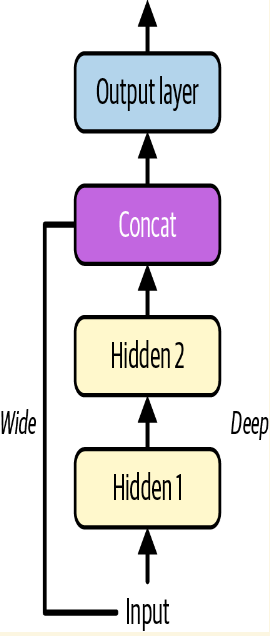

In [99]:
class WideAndDeep(nn.Module):
  def __init__(self, n_features):
    super().__init__()
    self.deep_stack = nn.Sequential(
        nn.Linear(n_features, 50),
        nn.ReLU(),
        nn.Linear(50, 40),
        nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + n_features, 1)

  def forward(self, X):
    deep_output = self.deep_stack(X)
    wide_and_deep = torch.concat([X, deep_output], dim=1)
    return self.output_layer(wide_and_deep)

In [100]:
[i for i in WideAndDeep(8).children()]

[Sequential(
   (0): Linear(in_features=8, out_features=50, bias=True)
   (1): ReLU()
   (2): Linear(in_features=50, out_features=40, bias=True)
   (3): ReLU()
 ),
 Linear(in_features=48, out_features=1, bias=True)]

In [101]:
[i for i in WideAndDeep(8).named_children()]

[('deep_stack',
  Sequential(
    (0): Linear(in_features=8, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): ReLU()
  )),
 ('output_layer', Linear(in_features=48, out_features=1, bias=True))]

In [102]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:1.3129
Epoch 2/20, Loss:0.6082
Epoch 3/20, Loss:0.5578
Epoch 4/20, Loss:0.5271
Epoch 5/20, Loss:0.5023
Epoch 6/20, Loss:0.4831
Epoch 7/20, Loss:0.4685
Epoch 8/20, Loss:0.4562
Epoch 9/20, Loss:0.4463
Epoch 10/20, Loss:0.4368
Epoch 11/20, Loss:0.4291
Epoch 12/20, Loss:0.4213
Epoch 13/20, Loss:0.4151
Epoch 14/20, Loss:0.4096
Epoch 15/20, Loss:0.4037
Epoch 16/20, Loss:0.3993
Epoch 17/20, Loss:0.3951
Epoch 18/20, Loss:0.3904
Epoch 19/20, Loss:0.3866
Epoch 20/20, Loss:0.3830


In [103]:
class WideAndDeepV2(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.deep_stack = nn.Sequential(
        nn.Linear(n_features - 2, 50), nn.ReLU(),   # 6 features left
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)   # 5 comes from wide


  def forward(self, X):
    X_wide = X[:, :5]
    X_deep = X[:, 2:]

    deep_output = self.deep_stack(X_deep)
    wide_and_deep = torch.concat([X_wide, deep_output], dim=1)

    return self.output_layer(wide_and_deep)


In [104]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:1.3746
Epoch 2/20, Loss:0.5893
Epoch 3/20, Loss:0.5364
Epoch 4/20, Loss:0.5051
Epoch 5/20, Loss:0.4832
Epoch 6/20, Loss:0.4675
Epoch 7/20, Loss:0.4565
Epoch 8/20, Loss:0.4473
Epoch 9/20, Loss:0.4406
Epoch 10/20, Loss:0.4351
Epoch 11/20, Loss:0.4301
Epoch 12/20, Loss:0.4260
Epoch 13/20, Loss:0.4233
Epoch 14/20, Loss:0.4197
Epoch 15/20, Loss:0.4175
Epoch 16/20, Loss:0.4156
Epoch 17/20, Loss:0.4133
Epoch 18/20, Loss:0.4117
Epoch 19/20, Loss:0.4095
Epoch 20/20, Loss:0.4080


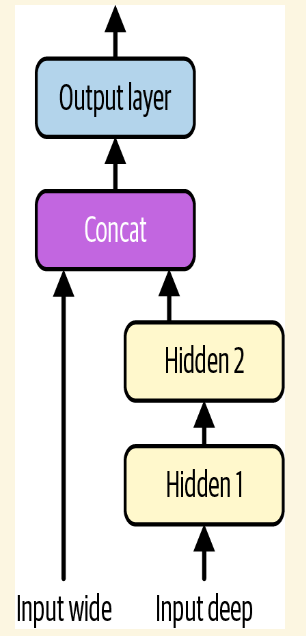

In [105]:
class WideAndDeepV3(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.deep_stack = nn.Sequential(
        nn.Linear(n_features - 2, 50), nn.ReLU(),   # 6 features left
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)   # 5 comes from wide

  def forward(self, X_wide, X_deep):
    deep_output = self.deep_stack(X_deep)
    wide_and_deep = torch.concat([X_wide, deep_output], dim=1)

    return self.output_layer(wide_and_deep)

In [106]:
train_data_wd = TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size=32, shuffle=True)
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32, shuffle=True)
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32, shuffle=True)

In [107]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    total_loss = 0.
    for X_batch_wide, X_batch_deep, y_batch in train_loader:
      X_batch_wide, X_batch_deep, y_batch = X_batch_wide.to(device), X_batch_deep.to(device), y_batch.to(device)
      y_pred = model(X_batch_wide, X_batch_deep)
      loss = criterion(y_pred, y_batch)
      total_loss = total_loss + loss
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    mean_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss:{mean_loss:.4f}')


In [108]:
torch.manual_seed(42)
model = WideAndDeepV3(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader_wd, n_epochs)

Epoch 1/20, Loss:1.3746
Epoch 2/20, Loss:0.5893
Epoch 3/20, Loss:0.5364
Epoch 4/20, Loss:0.5051
Epoch 5/20, Loss:0.4832
Epoch 6/20, Loss:0.4675
Epoch 7/20, Loss:0.4565
Epoch 8/20, Loss:0.4473
Epoch 9/20, Loss:0.4406
Epoch 10/20, Loss:0.4351
Epoch 11/20, Loss:0.4301
Epoch 12/20, Loss:0.4260
Epoch 13/20, Loss:0.4233
Epoch 14/20, Loss:0.4197
Epoch 15/20, Loss:0.4175
Epoch 16/20, Loss:0.4156
Epoch 17/20, Loss:0.4133
Epoch 18/20, Loss:0.4117
Epoch 19/20, Loss:0.4095
Epoch 20/20, Loss:0.4080


In [109]:
class WideAndDeepDataset(torch.utils.data.Dataset):
  def __init__(self, X_wide, X_deep, y):
    self.X_wide = X_wide
    self.X_deep = X_deep
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
    return input_dict, self.y[idx]


In [110]:
train_data_named = WideAndDeepDataset(X_wide = X_train[:, :5], X_deep = X_train[:, 2:], y=y_train)
valid_data_named = WideAndDeepDataset(X_wide = X_valid[:, :5], X_deep = X_valid[:, 2:], y=y_valid)
test_data_named = WideAndDeepDataset(X_wide = X_test[:, :5], X_deep = X_test[:, 2:], y=y_test)

train_loader_named = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_loader_named = DataLoader(valid_data_named, batch_size=32)
test_loader_named = DataLoader(test_data_named, batch_size=32)

In [111]:
import matplotlib.pyplot as plt

In [112]:
def train(model, optimizer, criterion, train_loader, n_epochs, plot_loss=False):
  losses = []
  for epoch in range(n_epochs):
    for inputs, y_batch in train_loader:
      inputs = {name: X.to(device) for name, X in inputs.items()}
      y_batch = y_batch.to(device)
      y_pred = model(X_wide=inputs['X_wide'], X_deep=inputs['X_deep'])
      loss = criterion(y_pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    losses.append(loss.item())
    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss}')

  if plot_loss:
    plt.figure(figsize=(8, 5))
    plt.title('Learning Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(n_epochs),losses);



In [113]:
lr = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
mse = nn.MSELoss()

In [114]:
model = model.to(device)

Epoch 1/20, Loss: 0.22751566767692566
Epoch 2/20, Loss: 0.26356884837150574
Epoch 3/20, Loss: 0.15898540616035461
Epoch 4/20, Loss: 0.24743926525115967
Epoch 5/20, Loss: 0.44917577505111694
Epoch 6/20, Loss: 0.4612320363521576
Epoch 7/20, Loss: 0.4319862127304077
Epoch 8/20, Loss: 0.42592447996139526
Epoch 9/20, Loss: 0.3154697120189667
Epoch 10/20, Loss: 0.7188652753829956
Epoch 11/20, Loss: 0.4158525764942169
Epoch 12/20, Loss: 0.5688604116439819
Epoch 13/20, Loss: 0.5155700445175171
Epoch 14/20, Loss: 0.3468373715877533
Epoch 15/20, Loss: 0.21252687275409698
Epoch 16/20, Loss: 0.13863161206245422
Epoch 17/20, Loss: 0.4275835454463959
Epoch 18/20, Loss: 0.36724281311035156
Epoch 19/20, Loss: 0.37497442960739136
Epoch 20/20, Loss: 0.4175233244895935


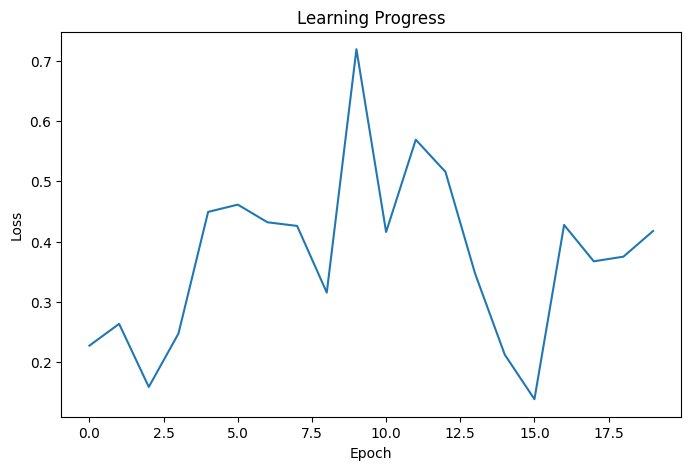

In [115]:
train(model, optimizer, mse, train_loader_named, 20, True)

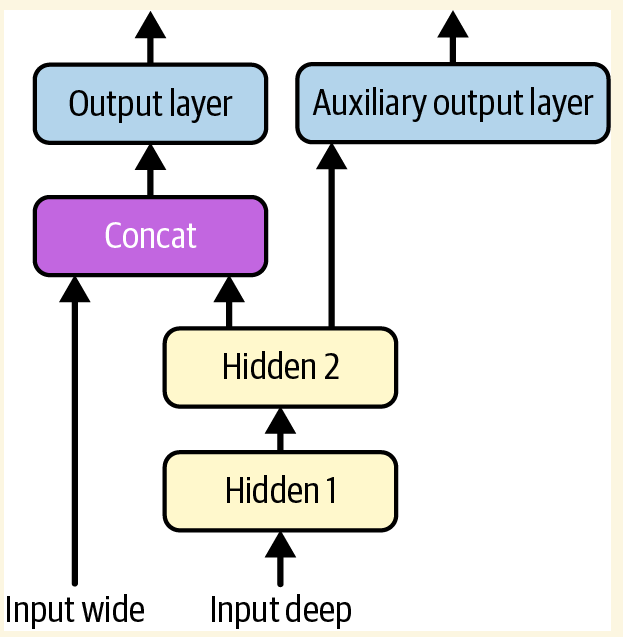

In [116]:
class WideAndDeepV4(nn.Module):
  def __init__(self, n_features):
    super().__init__()
    self.deep_stack = nn.Sequential(
        nn.Linear(6, 50), nn.ReLU(),
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)
    self.aux_output_layer = nn.Linear(40, 1)

  def forward(self, X_wide, X_deep):
    deep_output = self.deep_stack(X_deep)
    concat = torch.concat([X_wide, deep_output], dim=1)
    main_output = self.output_layer(concat)
    aux_output = self.aux_output_layer(deep_output)

    return main_output, aux_output


In [117]:
model = WideAndDeepV4(n_features)

In [118]:
model

WideAndDeepV4(
  (deep_stack): Sequential(
    (0): Linear(in_features=6, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): ReLU()
  )
  (output_layer): Linear(in_features=45, out_features=1, bias=True)
  (aux_output_layer): Linear(in_features=40, out_features=1, bias=True)
)

In [119]:
!pip install torchviz graphviz


In [120]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    for inputs, y_batch in train_loader:
      y_pred, y_pred_aux = model(**inputs)
      main_loss = criterion(y_pred, y_batch)
      aux_loss = criterion(y_pred_aux, y_batch)
      loss = 0.8 * main_loss + 0.2 * aux_loss

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss}')

In [121]:
lr = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
mse = nn.MSELoss()

In [122]:
train(model, optimizer, mse, train_loader_named, 20)

Epoch 1/20, Loss: 1.195892572402954
Epoch 2/20, Loss: 0.5507065057754517
Epoch 3/20, Loss: 0.3222310245037079
Epoch 4/20, Loss: 0.7082567811012268
Epoch 5/20, Loss: 0.47624099254608154
Epoch 6/20, Loss: 0.497837096452713
Epoch 7/20, Loss: 0.25536057353019714
Epoch 8/20, Loss: 0.3126903474330902
Epoch 9/20, Loss: 0.5606621503829956
Epoch 10/20, Loss: 0.3063320219516754
Epoch 11/20, Loss: 0.543297290802002
Epoch 12/20, Loss: 0.24221426248550415
Epoch 13/20, Loss: 0.3366376757621765
Epoch 14/20, Loss: 0.2639112174510956
Epoch 15/20, Loss: 0.3163433074951172
Epoch 16/20, Loss: 0.4944019913673401
Epoch 17/20, Loss: 0.38906192779541016
Epoch 18/20, Loss: 0.27128028869628906
Epoch 19/20, Loss: 0.469779908657074
Epoch 20/20, Loss: 0.2781878113746643


In [123]:
X_wide_graph = [i for i in train_loader_named][:1][0][0]['X_wide']
X_deep_graph = [i for i in train_loader_named][:1][0][0]['X_deep']

In [124]:
import torch
from torchviz import make_dot
import torchvision.models as models

In [125]:
model.eval()

batch_size = 1
X_wide = torch.zeros(batch_size, 5)
X_deep = torch.zeros(batch_size, 6)

y_pred, y_aux = model(X_wide, X_deep)

dot = make_dot(
    (y_pred + y_aux).sum(),
    params=dict(model.named_parameters())
)

dot.format = "png"
dot.render("wide_and_deep_graph")


'wide_and_deep_graph.png'

# Let's do some VISION👁

In [126]:
import torchvision
import torchvision.transforms.v2 as T

In [127]:
toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

In [128]:
train_and_valid_data = torchvision.datasets.FashionMNIST(
    root='datasets', train=True, download=True, transform=toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root='datasets', train=False, download=True, transform=toTensor)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.79MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 27.6MB/s]


In [129]:
torch.manual_seed(42)

In [130]:
train_data, valid_data = torch.utils.data.random_split(train_and_valid_data,
                                                       [55_000, 5_000])

In [131]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

In [132]:
X_sample, y_sample = train_data[0]

In [133]:
X_sample.shape

torch.Size([1, 28, 28])

In [134]:
X_sample.dtype

torch.float32

In [135]:
train_and_valid_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [136]:
class ImageClassifier(nn.Module):
  def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):
    super().__init__()
    self.mlp = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_inputs, n_hidden1),
        nn.ReLU(),
        nn.Linear(n_hidden1, n_hidden2),
        nn.ReLU(),
        nn.Linear(n_hidden2, n_classes),
    )

  def forward(self, X):
    return self.mlp(X)

In [137]:
torch.manual_seed(42)

In [138]:
model = ImageClassifier(n_inputs=28*28, n_hidden1=300, n_hidden2=100, n_classes=10)
model = model.to(device)
xentropy = nn.CrossEntropyLoss()

In [139]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    for X_batch, y_batch in train_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      loss = criterion(y_pred, y_batch)
      optimizer.step()
      optimizer.zero_grad()

    print(f'Epoch: {epoch+1}/{n_epochs}, Loss: {loss}')

In [140]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.002)

In [141]:
train(model, optimizer, xentropy, train_loader, 20)

Epoch: 1/20, Loss: 2.3152263164520264
Epoch: 2/20, Loss: 2.325509786605835
Epoch: 3/20, Loss: 2.322967529296875
Epoch: 4/20, Loss: 2.2849209308624268
Epoch: 5/20, Loss: 2.3055410385131836
Epoch: 6/20, Loss: 2.308236837387085
Epoch: 7/20, Loss: 2.325643539428711
Epoch: 8/20, Loss: 2.3125574588775635
Epoch: 9/20, Loss: 2.312513589859009
Epoch: 10/20, Loss: 2.29607892036438
Epoch: 11/20, Loss: 2.3331143856048584
Epoch: 12/20, Loss: 2.310720443725586
Epoch: 13/20, Loss: 2.3027515411376953
Epoch: 14/20, Loss: 2.3049120903015137
Epoch: 15/20, Loss: 2.324148654937744
Epoch: 16/20, Loss: 2.3035333156585693
Epoch: 17/20, Loss: 2.3219282627105713
Epoch: 18/20, Loss: 2.327850341796875
Epoch: 19/20, Loss: 2.3069262504577637
Epoch: 20/20, Loss: 2.3225433826446533


In [142]:
accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=10).to(device)

In [143]:
model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [144]:
X_new, y_new = next(iter(valid_loader))
X_new = X_new[:3].to(device)

with torch.no_grad():
  y_pred_logits = model(X_new)

y_pred = y_pred_logits.argmax(dim=1)
y_pred

tensor([5, 5, 5], device='cuda:0')

In [145]:
[train_and_valid_data.classes[index] for index in y_pred]

['Sandal', 'Sandal', 'Sandal']

In [146]:
X_new.shape

torch.Size([3, 1, 28, 28])

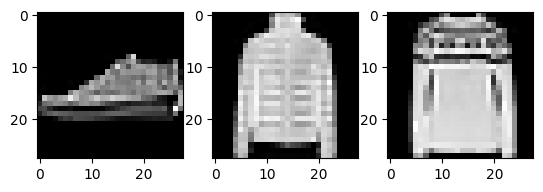

In [147]:
for i in range(X_new.shape[0]):
  plt.subplot(1, 3, i +1)
  plt.imshow(X_new[i, 0, :, :].cpu().numpy(), cmap='gray')

In [148]:
import torch.nn.functional as F

In [149]:
y_proba = F.softmax(y_pred_logits, dim=1)
y_proba.round(decimals=3)

tensor([[0.1040, 0.1010, 0.0960, 0.0950, 0.1010, 0.1060, 0.1010, 0.0930, 0.0990,
         0.1030],
        [0.1020, 0.1000, 0.0990, 0.0970, 0.0930, 0.1150, 0.1000, 0.0960, 0.1000,
         0.0970],
        [0.1010, 0.1040, 0.0990, 0.0920, 0.0940, 0.1160, 0.0970, 0.0970, 0.1010,
         0.0990]], device='cuda:0')

In [150]:
y_top4_logits, y_top4_indices = torch.topk(y_pred_logits, 4, dim=1)
y_top4_probas = F.softmax(y_top4_logits, dim=1)
y_top4_probas.round(decimals=3)

tensor([[0.2550, 0.2510, 0.2490, 0.2440],
        [0.2750, 0.2450, 0.2400, 0.2400],
        [0.2740, 0.2470, 0.2400, 0.2390]], device='cuda:0')

In [151]:
y_top4_indices

tensor([[5, 0, 9, 1],
        [5, 0, 1, 6],
        [5, 1, 0, 8]], device='cuda:0')

# Optimizing Models

In [152]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 13.6 MB/s eta 0:00:00


In [153]:
import optuna

In [154]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

In [155]:
import optuna

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    history = train2(model, optimizer, xentropy, accuracy, train_loader,
                     valid_loader, n_epochs=10)
    validation_accuracy = max(history["valid_metrics"])
    return validation_accuracy

In [156]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=5)

[I 2026-02-10 14:07:57,680] A new study created in memory with name: no-name-eb1c0012-1906-49a6-b8ef-1f9f24a06d0f


Epoch 1/10, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 2/10, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 3/10, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4554
Epoch 4/10, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5562
Epoch 5/10, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 6/10, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 7/10, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 8/10, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 9/10, train loss: 1.1572, train metric: 0.6468, valid metric: 0.6424


[I 2026-02-10 14:10:27,878] Trial 0 finished with value: 0.6435999870300293 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.6435999870300293.


Epoch 10/10, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/10, train loss: 1.1459, train metric: 0.6229, valid metric: 0.7338
Epoch 2/10, train loss: 0.6108, train metric: 0.7841, valid metric: 0.7992
Epoch 3/10, train loss: 0.5203, train metric: 0.8169, valid metric: 0.8094
Epoch 4/10, train loss: 0.4810, train metric: 0.8302, valid metric: 0.8310
Epoch 5/10, train loss: 0.4557, train metric: 0.8404, valid metric: 0.8352
Epoch 6/10, train loss: 0.4387, train metric: 0.8460, valid metric: 0.8442
Epoch 7/10, train loss: 0.4240, train metric: 0.8512, valid metric: 0.8408
Epoch 8/10, train loss: 0.4123, train metric: 0.8566, valid metric: 0.8514
Epoch 9/10, train loss: 0.3998, train metric: 0.8601, valid metric: 0.8532


[I 2026-02-10 14:12:56,262] Trial 1 finished with value: 0.8547999858856201 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.3897, train metric: 0.8638, valid metric: 0.8548
Epoch 1/10, train loss: 2.3069, train metric: 0.1144, valid metric: 0.1082
Epoch 2/10, train loss: 2.2993, train metric: 0.1231, valid metric: 0.1294
Epoch 3/10, train loss: 2.2914, train metric: 0.1606, valid metric: 0.1710
Epoch 4/10, train loss: 2.2836, train metric: 0.1839, valid metric: 0.1840
Epoch 5/10, train loss: 2.2762, train metric: 0.1891, valid metric: 0.1856
Epoch 6/10, train loss: 2.2692, train metric: 0.1910, valid metric: 0.1898
Epoch 7/10, train loss: 2.2623, train metric: 0.1933, valid metric: 0.1932
Epoch 8/10, train loss: 2.2554, train metric: 0.2000, valid metric: 0.2022
Epoch 9/10, train loss: 2.2485, train metric: 0.2122, valid metric: 0.2160


[I 2026-02-10 14:15:26,125] Trial 2 finished with value: 0.23340000212192535 and parameters: {'learning_rate': 4.207988669606632e-05, 'n_hidden': 63}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 2.2414, train metric: 0.2299, valid metric: 0.2334
Epoch 1/10, train loss: 2.3035, train metric: 0.1373, valid metric: 0.1526
Epoch 2/10, train loss: 2.3005, train metric: 0.1569, valid metric: 0.1724
Epoch 3/10, train loss: 2.2975, train metric: 0.1755, valid metric: 0.1896
Epoch 4/10, train loss: 2.2945, train metric: 0.1941, valid metric: 0.2132
Epoch 5/10, train loss: 2.2914, train metric: 0.2105, valid metric: 0.2288
Epoch 6/10, train loss: 2.2884, train metric: 0.2261, valid metric: 0.2418
Epoch 7/10, train loss: 2.2853, train metric: 0.2419, valid metric: 0.2580
Epoch 8/10, train loss: 2.2823, train metric: 0.2581, valid metric: 0.2742
Epoch 9/10, train loss: 2.2792, train metric: 0.2736, valid metric: 0.2918


[I 2026-02-10 14:17:55,183] Trial 3 finished with value: 0.30959999561309814 and parameters: {'learning_rate': 1.7073967431528103e-05, 'n_hidden': 263}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 2.2761, train metric: 0.2897, valid metric: 0.3096
Epoch 1/10, train loss: 1.8379, train metric: 0.4869, valid metric: 0.6208
Epoch 2/10, train loss: 0.9751, train metric: 0.6666, valid metric: 0.6978
Epoch 3/10, train loss: 0.7608, train metric: 0.7253, valid metric: 0.7416
Epoch 4/10, train loss: 0.6704, train metric: 0.7639, valid metric: 0.7720
Epoch 5/10, train loss: 0.6108, train metric: 0.7913, valid metric: 0.7906
Epoch 6/10, train loss: 0.5687, train metric: 0.8053, valid metric: 0.8050
Epoch 7/10, train loss: 0.5386, train metric: 0.8164, valid metric: 0.8082
Epoch 8/10, train loss: 0.5158, train metric: 0.8243, valid metric: 0.8214
Epoch 9/10, train loss: 0.4988, train metric: 0.8279, valid metric: 0.8220


[I 2026-02-10 14:20:24,135] Trial 4 finished with value: 0.8220000267028809 and parameters: {'learning_rate': 0.002537815508265664, 'n_hidden': 218}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.4842, train metric: 0.8330, valid metric: 0.8092


In [157]:
study.best_params

{'learning_rate': 0.008471801418819975, 'n_hidden': 188}

In [158]:
study.best_value

0.8547999858856201

In [159]:
def objective(trial, train_loader, valid_loader):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    best_validation_accuracy = 0.0
    for epoch in range(n_epochs):
        history = train2(model, optimizer, xentropy, accuracy, train_loader,
                         valid_loader, n_epochs=1)
        validation_accuracy = max(history["valid_metrics"])
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
        trial.report(validation_accuracy, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return best_validation_accuracy

In [160]:
objective_with_data = lambda trial: objective(
    trial, train_loader=train_loader, valid_loader=valid_loader)

In [161]:
from functools import partial

objective_with_data = partial(objective, train_loader=train_loader,
                              valid_loader=valid_loader)

In [162]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction="maximize", sampler=sampler,
                            pruner=pruner)
study.optimize(objective_with_data, n_trials=20)

[I 2026-02-10 14:20:24,185] A new study created in memory with name: no-name-23000a6c-5183-4cdf-aa54-156400225ff0


Epoch 1/1, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 1/1, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 1/1, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4554
Epoch 1/1, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5562
Epoch 1/1, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 1/1, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 1/1, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 1/1, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 1/1, train loss: 1.1572, train metric: 0.6468, valid metric: 0.6424
Epoch 1/1, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/1, train loss: 1.0162, train metric: 0.6611, valid metric: 0.6530
Epoch 1/1, train loss: 0.9665, train metric: 0.6689, valid metric: 0.6620
Epoch 1/1, train loss: 0.9258, train metric: 0.6761, valid metric: 0.6700
Epoch 1/1, train loss: 0.8919, train m

[I 2026-02-10 14:25:29,008] Trial 0 finished with value: 0.7089999914169312 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.7089999914169312.


Epoch 1/1, train loss: 0.7647, train metric: 0.7196, valid metric: 0.7082
Epoch 1/1, train loss: 1.1485, train metric: 0.6157, valid metric: 0.7332
Epoch 1/1, train loss: 0.6133, train metric: 0.7864, valid metric: 0.8082
Epoch 1/1, train loss: 0.5200, train metric: 0.8179, valid metric: 0.8136
Epoch 1/1, train loss: 0.4783, train metric: 0.8311, valid metric: 0.8232
Epoch 1/1, train loss: 0.4533, train metric: 0.8402, valid metric: 0.8020
Epoch 1/1, train loss: 0.4357, train metric: 0.8465, valid metric: 0.8446
Epoch 1/1, train loss: 0.4211, train metric: 0.8510, valid metric: 0.8276
Epoch 1/1, train loss: 0.4083, train metric: 0.8562, valid metric: 0.8398
Epoch 1/1, train loss: 0.3981, train metric: 0.8606, valid metric: 0.8532
Epoch 1/1, train loss: 0.3881, train metric: 0.8640, valid metric: 0.8582
Epoch 1/1, train loss: 0.3782, train metric: 0.8663, valid metric: 0.8532
Epoch 1/1, train loss: 0.3699, train metric: 0.8693, valid metric: 0.8566
Epoch 1/1, train loss: 0.3631, train m

[I 2026-02-10 14:30:28,804] Trial 1 finished with value: 0.8679999709129333 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8679999709129333.


Epoch 1/1, train loss: 0.3191, train metric: 0.8862, valid metric: 0.8638
Epoch 1/1, train loss: 2.2998, train metric: 0.1078, valid metric: 0.1152
Epoch 1/1, train loss: 2.2923, train metric: 0.1305, valid metric: 0.1432
Epoch 1/1, train loss: 2.2856, train metric: 0.1605, valid metric: 0.1704
Epoch 1/1, train loss: 2.2797, train metric: 0.1872, valid metric: 0.1912
Epoch 1/1, train loss: 2.2744, train metric: 0.2091, valid metric: 0.2114
Epoch 1/1, train loss: 2.2693, train metric: 0.2230, valid metric: 0.2216
Epoch 1/1, train loss: 2.2643, train metric: 0.2332, valid metric: 0.2320
Epoch 1/1, train loss: 2.2591, train metric: 0.2408, valid metric: 0.2380
Epoch 1/1, train loss: 2.2538, train metric: 0.2456, valid metric: 0.2424
Epoch 1/1, train loss: 2.2481, train metric: 0.2493, valid metric: 0.2456
Epoch 1/1, train loss: 2.2422, train metric: 0.2511, valid metric: 0.2464
Epoch 1/1, train loss: 2.2360, train metric: 0.2534, valid metric: 0.2476
Epoch 1/1, train loss: 2.2296, train m

[I 2026-02-10 14:35:24,210] Trial 2 finished with value: 0.25380000472068787 and parameters: {'learning_rate': 4.207988669606632e-05, 'n_hidden': 63}. Best is trial 1 with value: 0.8679999709129333.


Epoch 1/1, train loss: 2.1751, train metric: 0.2610, valid metric: 0.2538
Epoch 1/1, train loss: 2.3015, train metric: 0.0997, valid metric: 0.1028
Epoch 1/1, train loss: 2.2984, train metric: 0.1009, valid metric: 0.1050
Epoch 1/1, train loss: 2.2953, train metric: 0.1051, valid metric: 0.1124
Epoch 1/1, train loss: 2.2923, train metric: 0.1160, valid metric: 0.1270
Epoch 1/1, train loss: 2.2894, train metric: 0.1347, valid metric: 0.1496
Epoch 1/1, train loss: 2.2865, train metric: 0.1548, valid metric: 0.1652
Epoch 1/1, train loss: 2.2837, train metric: 0.1699, valid metric: 0.1800
Epoch 1/1, train loss: 2.2808, train metric: 0.1800, valid metric: 0.1872
Epoch 1/1, train loss: 2.2780, train metric: 0.1855, valid metric: 0.1916
Epoch 1/1, train loss: 2.2752, train metric: 0.1893, valid metric: 0.1960
Epoch 1/1, train loss: 2.2725, train metric: 0.1950, valid metric: 0.2008
Epoch 1/1, train loss: 2.2697, train metric: 0.2000, valid metric: 0.2026
Epoch 1/1, train loss: 2.2669, train m

[I 2026-02-10 14:40:18,032] Trial 3 finished with value: 0.23960000276565552 and parameters: {'learning_rate': 1.7073967431528103e-05, 'n_hidden': 263}. Best is trial 1 with value: 0.8679999709129333.


Epoch 1/1, train loss: 2.2469, train metric: 0.2429, valid metric: 0.2396
Epoch 1/1, train loss: 1.8945, train metric: 0.4923, valid metric: 0.6290
Epoch 1/1, train loss: 1.0016, train metric: 0.6582, valid metric: 0.6772
Epoch 1/1, train loss: 0.7747, train metric: 0.7115, valid metric: 0.7248
Epoch 1/1, train loss: 0.6864, train metric: 0.7551, valid metric: 0.7596
Epoch 1/1, train loss: 0.6268, train metric: 0.7833, valid metric: 0.7806
Epoch 1/1, train loss: 0.5830, train metric: 0.8000, valid metric: 0.7864
Epoch 1/1, train loss: 0.5500, train metric: 0.8113, valid metric: 0.8064
Epoch 1/1, train loss: 0.5252, train metric: 0.8184, valid metric: 0.8130
Epoch 1/1, train loss: 0.5061, train metric: 0.8238, valid metric: 0.8204
Epoch 1/1, train loss: 0.4908, train metric: 0.8290, valid metric: 0.8206
Epoch 1/1, train loss: 0.4777, train metric: 0.8338, valid metric: 0.8150
Epoch 1/1, train loss: 0.4681, train metric: 0.8375, valid metric: 0.8304
Epoch 1/1, train loss: 0.4591, train m

[I 2026-02-10 14:45:10,039] Trial 4 finished with value: 0.8429999947547913 and parameters: {'learning_rate': 0.002537815508265664, 'n_hidden': 218}. Best is trial 1 with value: 0.8679999709129333.


Epoch 1/1, train loss: 0.4173, train metric: 0.8556, valid metric: 0.8430


[I 2026-02-10 14:45:24,514] Trial 5 pruned. 


Epoch 1/1, train loss: 2.3017, train metric: 0.1007, valid metric: 0.1056
Epoch 1/1, train loss: 0.8584, train metric: 0.7026, valid metric: 0.7982
Epoch 1/1, train loss: 0.5069, train metric: 0.8211, valid metric: 0.8228
Epoch 1/1, train loss: 0.4499, train metric: 0.8404, valid metric: 0.8340
Epoch 1/1, train loss: 0.4183, train metric: 0.8517, valid metric: 0.8512
Epoch 1/1, train loss: 0.3936, train metric: 0.8579, valid metric: 0.8478
Epoch 1/1, train loss: 0.3755, train metric: 0.8661, valid metric: 0.8520
Epoch 1/1, train loss: 0.3602, train metric: 0.8699, valid metric: 0.8640
Epoch 1/1, train loss: 0.3477, train metric: 0.8746, valid metric: 0.8666
Epoch 1/1, train loss: 0.3359, train metric: 0.8784, valid metric: 0.8712
Epoch 1/1, train loss: 0.3264, train metric: 0.8823, valid metric: 0.8712
Epoch 1/1, train loss: 0.3180, train metric: 0.8846, valid metric: 0.8698
Epoch 1/1, train loss: 0.3097, train metric: 0.8864, valid metric: 0.8784
Epoch 1/1, train loss: 0.3021, train m

[I 2026-02-10 14:50:15,863] Trial 6 finished with value: 0.8853999972343445 and parameters: {'learning_rate': 0.021368329072358756, 'n_hidden': 79}. Best is trial 6 with value: 0.8853999972343445.


Epoch 1/1, train loss: 0.2600, train metric: 0.9043, valid metric: 0.8854


[I 2026-02-10 14:50:30,294] Trial 7 pruned. 


Epoch 1/1, train loss: 2.2926, train metric: 0.1081, valid metric: 0.1064


[I 2026-02-10 14:50:44,873] Trial 8 pruned. 


Epoch 1/1, train loss: 2.2836, train metric: 0.1225, valid metric: 0.1526


[I 2026-02-10 14:50:59,420] Trial 9 pruned. 


Epoch 1/1, train loss: 2.2631, train metric: 0.2483, valid metric: 0.3554
Epoch 1/1, train loss: 0.6987, train metric: 0.7437, valid metric: 0.8334
Epoch 1/1, train loss: 0.4543, train metric: 0.8360, valid metric: 0.8288
Epoch 1/1, train loss: 0.4144, train metric: 0.8490, valid metric: 0.8488
Epoch 1/1, train loss: 0.3903, train metric: 0.8575, valid metric: 0.8354
Epoch 1/1, train loss: 0.3719, train metric: 0.8637, valid metric: 0.8454
Epoch 1/1, train loss: 0.3600, train metric: 0.8676, valid metric: 0.8538
Epoch 1/1, train loss: 0.3476, train metric: 0.8716, valid metric: 0.8554
Epoch 1/1, train loss: 0.3408, train metric: 0.8744, valid metric: 0.8570
Epoch 1/1, train loss: 0.3327, train metric: 0.8781, valid metric: 0.8526
Epoch 1/1, train loss: 0.3281, train metric: 0.8784, valid metric: 0.8620
Epoch 1/1, train loss: 0.3220, train metric: 0.8824, valid metric: 0.8650
Epoch 1/1, train loss: 0.3178, train metric: 0.8827, valid metric: 0.8680
Epoch 1/1, train loss: 0.3126, train m

[I 2026-02-10 14:55:51,200] Trial 10 finished with value: 0.8744000196456909 and parameters: {'learning_rate': 0.08165528450509137, 'n_hidden': 21}. Best is trial 6 with value: 0.8853999972343445.


Epoch 1/1, train loss: 0.2908, train metric: 0.8915, valid metric: 0.8604
Epoch 1/1, train loss: 0.6527, train metric: 0.7611, valid metric: 0.8132
Epoch 1/1, train loss: 0.4509, train metric: 0.8355, valid metric: 0.8452
Epoch 1/1, train loss: 0.4139, train metric: 0.8495, valid metric: 0.8462
Epoch 1/1, train loss: 0.3909, train metric: 0.8578, valid metric: 0.8522
Epoch 1/1, train loss: 0.3755, train metric: 0.8626, valid metric: 0.8498
Epoch 1/1, train loss: 0.3641, train metric: 0.8658, valid metric: 0.8566
Epoch 1/1, train loss: 0.3536, train metric: 0.8695, valid metric: 0.8534
Epoch 1/1, train loss: 0.3476, train metric: 0.8734, valid metric: 0.8600
Epoch 1/1, train loss: 0.3391, train metric: 0.8772, valid metric: 0.8556
Epoch 1/1, train loss: 0.3309, train metric: 0.8779, valid metric: 0.8600
Epoch 1/1, train loss: 0.3271, train metric: 0.8809, valid metric: 0.8628
Epoch 1/1, train loss: 0.3212, train metric: 0.8814, valid metric: 0.8650
Epoch 1/1, train loss: 0.3187, train m

[I 2026-02-10 15:00:42,423] Trial 11 finished with value: 0.8686000108718872 and parameters: {'learning_rate': 0.07553503645583189, 'n_hidden': 21}. Best is trial 6 with value: 0.8853999972343445.


Epoch 1/1, train loss: 0.2937, train metric: 0.8901, valid metric: 0.8550
Epoch 1/1, train loss: 0.6195, train metric: 0.7764, valid metric: 0.8170
Epoch 1/1, train loss: 0.4179, train metric: 0.8472, valid metric: 0.8488
Epoch 1/1, train loss: 0.3729, train metric: 0.8637, valid metric: 0.8500
Epoch 1/1, train loss: 0.3477, train metric: 0.8713, valid metric: 0.8666
Epoch 1/1, train loss: 0.3280, train metric: 0.8791, valid metric: 0.8670
Epoch 1/1, train loss: 0.3120, train metric: 0.8842, valid metric: 0.8716
Epoch 1/1, train loss: 0.2989, train metric: 0.8886, valid metric: 0.8730
Epoch 1/1, train loss: 0.2866, train metric: 0.8923, valid metric: 0.8780
Epoch 1/1, train loss: 0.2771, train metric: 0.8978, valid metric: 0.8544
Epoch 1/1, train loss: 0.2690, train metric: 0.8984, valid metric: 0.8774
Epoch 1/1, train loss: 0.2588, train metric: 0.9028, valid metric: 0.8776
Epoch 1/1, train loss: 0.2506, train metric: 0.9062, valid metric: 0.8808
Epoch 1/1, train loss: 0.2432, train m

[I 2026-02-10 15:05:34,380] Trial 12 finished with value: 0.8867999911308289 and parameters: {'learning_rate': 0.08525846269447772, 'n_hidden': 116}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2030, train metric: 0.9223, valid metric: 0.8744
Epoch 1/1, train loss: 0.8659, train metric: 0.7036, valid metric: 0.7850
Epoch 1/1, train loss: 0.5120, train metric: 0.8185, valid metric: 0.8188
Epoch 1/1, train loss: 0.4574, train metric: 0.8378, valid metric: 0.8286
Epoch 1/1, train loss: 0.4263, train metric: 0.8487, valid metric: 0.8460
Epoch 1/1, train loss: 0.4035, train metric: 0.8569, valid metric: 0.8448
Epoch 1/1, train loss: 0.3874, train metric: 0.8618, valid metric: 0.8476
Epoch 1/1, train loss: 0.3711, train metric: 0.8666, valid metric: 0.8340
Epoch 1/1, train loss: 0.3580, train metric: 0.8712, valid metric: 0.8580
Epoch 1/1, train loss: 0.3456, train metric: 0.8760, valid metric: 0.8660
Epoch 1/1, train loss: 0.3345, train metric: 0.8791, valid metric: 0.8686
Epoch 1/1, train loss: 0.3258, train metric: 0.8815, valid metric: 0.8662
Epoch 1/1, train loss: 0.3169, train metric: 0.8858, valid metric: 0.8750
Epoch 1/1, train loss: 0.3089, train m

[I 2026-02-10 15:10:30,066] Trial 13 finished with value: 0.8784000277519226 and parameters: {'learning_rate': 0.01891149541864801, 'n_hidden': 116}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2671, train metric: 0.9020, valid metric: 0.8784
Epoch 1/1, train loss: 0.9440, train metric: 0.6748, valid metric: 0.7730
Epoch 1/1, train loss: 0.5292, train metric: 0.8132, valid metric: 0.8262
Epoch 1/1, train loss: 0.4689, train metric: 0.8346, valid metric: 0.8306
Epoch 1/1, train loss: 0.4349, train metric: 0.8445, valid metric: 0.8290
Epoch 1/1, train loss: 0.4107, train metric: 0.8556, valid metric: 0.8436


[I 2026-02-10 15:11:57,932] Trial 14 pruned. 


Epoch 1/1, train loss: 0.3919, train metric: 0.8613, valid metric: 0.8300


[I 2026-02-10 15:12:12,911] Trial 15 pruned. 


Epoch 1/1, train loss: 1.8496, train metric: 0.4092, valid metric: 0.6042
Epoch 1/1, train loss: 0.7456, train metric: 0.7386, valid metric: 0.7672
Epoch 1/1, train loss: 0.4683, train metric: 0.8341, valid metric: 0.8424
Epoch 1/1, train loss: 0.4143, train metric: 0.8511, valid metric: 0.8464
Epoch 1/1, train loss: 0.3811, train metric: 0.8621, valid metric: 0.8568
Epoch 1/1, train loss: 0.3579, train metric: 0.8696, valid metric: 0.8682
Epoch 1/1, train loss: 0.3400, train metric: 0.8758, valid metric: 0.8690
Epoch 1/1, train loss: 0.3261, train metric: 0.8804, valid metric: 0.8708
Epoch 1/1, train loss: 0.3149, train metric: 0.8837, valid metric: 0.8794
Epoch 1/1, train loss: 0.3020, train metric: 0.8895, valid metric: 0.8714
Epoch 1/1, train loss: 0.2935, train metric: 0.8930, valid metric: 0.8400
Epoch 1/1, train loss: 0.2845, train metric: 0.8949, valid metric: 0.8720
Epoch 1/1, train loss: 0.2761, train metric: 0.8982, valid metric: 0.8792
Epoch 1/1, train loss: 0.2684, train m

[I 2026-02-10 15:17:02,567] Trial 16 finished with value: 0.8848000168800354 and parameters: {'learning_rate': 0.032666299131732864, 'n_hidden': 142}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2271, train metric: 0.9154, valid metric: 0.8800


[I 2026-02-10 15:17:16,957] Trial 17 pruned. 


Epoch 1/1, train loss: 1.5604, train metric: 0.5038, valid metric: 0.6536
Epoch 1/1, train loss: 0.6189, train metric: 0.7751, valid metric: 0.8314
Epoch 1/1, train loss: 0.4237, train metric: 0.8447, valid metric: 0.8492
Epoch 1/1, train loss: 0.3814, train metric: 0.8605, valid metric: 0.8582
Epoch 1/1, train loss: 0.3567, train metric: 0.8681, valid metric: 0.8622
Epoch 1/1, train loss: 0.3375, train metric: 0.8744, valid metric: 0.8674
Epoch 1/1, train loss: 0.3246, train metric: 0.8788, valid metric: 0.8480
Epoch 1/1, train loss: 0.3123, train metric: 0.8849, valid metric: 0.8644
Epoch 1/1, train loss: 0.3012, train metric: 0.8871, valid metric: 0.8734
Epoch 1/1, train loss: 0.2915, train metric: 0.8916, valid metric: 0.8760
Epoch 1/1, train loss: 0.2858, train metric: 0.8931, valid metric: 0.8758
Epoch 1/1, train loss: 0.2778, train metric: 0.8955, valid metric: 0.8804
Epoch 1/1, train loss: 0.2715, train metric: 0.8972, valid metric: 0.8616
Epoch 1/1, train loss: 0.2642, train m

[I 2026-02-10 15:22:05,345] Trial 18 finished with value: 0.8830000162124634 and parameters: {'learning_rate': 0.0954812841907134, 'n_hidden': 50}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2353, train metric: 0.9109, valid metric: 0.8830


[I 2026-02-10 15:22:19,759] Trial 19 pruned. 


Epoch 1/1, train loss: 0.7417, train metric: 0.7395, valid metric: 0.7640


In [163]:
study.best_value

0.8867999911308289

In [164]:
study.best_params

{'learning_rate': 0.08525846269447772, 'n_hidden': 116}

In [165]:
torch.save(model, "my_fashion_mnist.pt")


In [166]:
loaded_model = torch.load("my_fashion_mnist.pt", weights_only=False)
loaded_model.eval()


ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [167]:
y_pred_logits = loaded_model(X_new)


In [168]:
torch.save(model.state_dict(), "my_fashion_mnist_weights.pt")


In [169]:
type(model.state_dict())

collections.OrderedDict

In [170]:
new_model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                            n_classes=10)
loaded_weights = torch.load("my_fashion_mnist_weights.pt", weights_only=True)
new_model.load_state_dict(loaded_weights)
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [171]:
model_data = {
    "model_state_dict": model.state_dict(),
    "model_hyperparameters": {
        "n_inputs": 1 * 28 * 28,
        "n_hidden1": 300,
        "n_hidden2": 100,
        "n_classes": 10,
    }
}
torch.save(model_data, "my_fashion_mnist_model.pt")

In [172]:
loaded_data = torch.load("my_fashion_mnist_model.pt", weights_only=True)
new_model = ImageClassifier(**loaded_data["model_hyperparameters"])
new_model.load_state_dict(loaded_data["model_state_dict"])
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

# Compile And Optimize the model

In [173]:
torchscript_model = torch.jit.trace(model, X_new)

In [174]:
torchscript_model = torch.jit.script(model)

In [175]:
optimized_model = torch.jit.optimize_for_inference(torchscript_model)

In [176]:
optimized_model.save("my_fashion_mnist_torchscript.pt")

In [177]:
loaded_torchscript_model = torch.jit.load("my_fashion_mnist_torchscript.pt")

In [178]:
y_pred_logits = loaded_torchscript_model(X_new)
y_pred_logits

tensor([[ 0.0652,  0.0380, -0.0122, -0.0232,  0.0297,  0.0806,  0.0308, -0.0485,
          0.0107,  0.0576],
        [ 0.0465,  0.0283,  0.0113, -0.0102, -0.0434,  0.1644,  0.0259, -0.0159,
          0.0255, -0.0020],
        [ 0.0480,  0.0739,  0.0270, -0.0492, -0.0292,  0.1788,  0.0088,  0.0017,
          0.0444,  0.0216]], device='cuda:0')

In [179]:
compiled_model = torch.compile(model)

In [180]:
if device == "cuda":
    y_pred_logits = compiled_model(X_new)

/usr/local/lib/python3.12/dist-packages/torch/backends/cuda/__init__.py:131: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  return torch._C._get_cublas_allow_tf32()
W0210 15:22:28.991000 296 torch/_inductor/utils.py:1558] [0/0] Not enough SMs to use max_autotune_gemm mode
